In [1]:
import sys
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
print("My working directory:\n" + os.getcwd())

My working directory:
/home/dsxuser/work


# IBM Db2 database practice

# Introduction

This notebook illustrates how to access a DB2 database on Cloud using Python by following the steps below:
1. Import the `ibm_db` Python library
1. Enter the database connection credentials
1. Create the database connection
1. Close the database connection



__Note:__ Please follow the instructions given in the first Lab of this course to Create a database service instance of Db2 on Cloud and retrieve your database Service Credentials.

## Import the `ibm_db` Python library

The `ibm_db` [API ](https://pypi.python.org/pypi/ibm_db/) provides a variety of useful Python functions for accessing and manipulating data in an IBM® data server database, including functions for connecting to a database, preparing and issuing SQL statements, fetching rows from result sets, calling stored procedures, committing and rolling back transactions, handling errors, and retrieving metadata.


We first import the ibm_db library into our Python Application

Execute the following cell by clicking within it and then 
press `Shift` and `Enter` keys simultaneously


In [118]:
import ibm_db
import pandas as pd

When the command above completes, the `ibm_db` library is loaded in your notebook. 


## Identify the database connection credentials

Connecting to dashDB or DB2 database requires the following information:
* Driver Name
* Database name 
* Host DNS name or IP address 
* Host port
* Connection protocol
* User ID (or username)
* User Password



__Notice:__ To obtain credentials please refer to the instructions given in the first Lab of this course

Now enter your database credentials below and execute the cell with `Shift` + `Enter`


In [13]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "xks76134"        # e.g. "abc12345"
dsn_pwd = "npglfs0j-k5sx39v"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"

In [14]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=xks76134;PWD=npglfs0j-k5sx39v;


In [15]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  xks76134 on host:  dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net


In [16]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.01.0404
DB_NAME:    BLUDB


In [17]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

DRIVER_NAME:           libdb2.a
DRIVER_VER:            11.01.0303
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1208
CONN_CODEPAGE:         1208


## Close the Connection
We free all resources by closing the connection. Remember that it is always important to close connections so that we can avoid unused connections taking up resources.

In [18]:
ibm_db.close(conn)

True

# Introduction

This notebook illustrates how to access your database instance using Python by following the steps below:
1. Import the `ibm_db` Python library
1. Identify and enter the database connection credentials
1. Create the database connection
1. Create a table
1. Insert data into the table
1. Query data from the table
1. Retrieve the result set into a pandas dataframe
1. Close the database connection


__Notice:__ Please follow the instructions given in the first Lab of this course to Create a database service instance of Db2 on Cloud.

## Task 1: Import the `ibm_db` Python library

The `ibm_db` [API ](https://pypi.python.org/pypi/ibm_db/) provides a variety of useful Python functions for accessing and manipulating data in an IBM® data server database, including functions for connecting to a database, preparing and issuing SQL statements, fetching rows from result sets, calling stored procedures, committing and rolling back transactions, handling errors, and retrieving metadata.


We import the ibm_db library into our Python Application


In [3]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "xks76134"        # e.g. "abc12345"
dsn_pwd = "npglfs0j-k5sx39v"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"

In [4]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  xks76134 on host:  dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net


## Task 4: Create a table in the database

In this step we will create a table in the database with following details:

<img src = "https://ibm.box.com/shared/static/ztd2cn4xkdoj5erlk4hhng39kbp63s1h.jpg" align="center">


In [11]:
#Lets first drop the table INSTRUCTOR in case it exists from a previous attempt
dropQuery = "drop table INSTRUCTOR"

#Now execute the drop statment
dropStmt = ibm_db.exec_immediate(conn, dropQuery)

## Dont worry if you get this error:
If you see an exception/error similar to the following, indicating that INSTRUCTOR is an undefined name, that's okay. It just implies that the INSTRUCTOR table does not exist in the table - which would be the case if you had not created it previously.

Exception: [IBM][CLI Driver][DB2/LINUXX8664] SQL0204N  "ABC12345.INSTRUCTOR" is an undefined name.  SQLSTATE=42704 SQLCODE=-204

In [12]:
#Construct the Create Table DDL statement - replace the ... with rest of the statement
createQuery = '''create table INSTRUCTOR(id INTEGER PRIMARY KEY NOT NULL, 
                                            FNAME VARCHAR(20), 
                                            LNAME VARCHAR(20), 
                                            CITY VARCHAR(20), 
                                            CCODE CHAR(2))'''

#Now fill in the name of the method and execute the statement
createStmt = ibm_db.exec_immediate(conn,createQuery)

## Task 5: Insert data into the table

In this step we will insert some rows of data into the table. 

The INSTRUCTOR table we created in the previous step contains 3 rows of data:

<img src="https://ibm.box.com/shared/static/j5yjassxefrjknivfpekj7698dqe4d8i.jpg" align="center">

We will start by inserting just the first row of data, i.e. for instructor Rav Ahuja 


In [30]:
#Construct the query - replace ... with the insert statement
insertQuery = '''insert into INSTRUCTOR values (1, 'Rav', 'Ahuja', 'TORONTO', 'CA'),
                                                (2, 'Raul', 'Chong', 'Markham', 'CA'),
                                                (3, 'Hima', 'Vasudevan', 'Chicago', 'US')'''

#execute the insert statement
insertStmt = ibm_db.exec_immediate(conn, insertQuery)

Exception: Connection is not active

## Task 6: Query data in the table

In this step we will retrieve data we inserted into the INSTRUCTOR table. 

In [18]:
#Construct the query that retrieves all rows from the INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#Execute the statement
selectStmt = ibm_db.exec_immediate(conn, selectQuery)

#Fetch the Dictionary (for the first row only) - replace ... with your code
ibm_db.fetch_both(selectStmt)

{'ID': 1,
 0: 1,
 'FNAME': 'Rav',
 1: 'Rav',
 'LNAME': 'Ahuja',
 2: 'Ahuja',
 'CITY': 'TORONTO',
 3: 'TORONTO',
 'CCODE': 'CA',
 4: 'CA'}

In [29]:
#Fetch the rest of the rows and print the ID and FNAME for those rows
while ibm_db.fetch_row(selectStmt) != False:
   print (" ID:",  ibm_db.result(selectStmt, 0), " FNAME:",  ibm_db.result(selectStmt, "FNAME"))

Bonus: now write and execute an update statement that changes the Rav's CITY to MOOSETOWN 

In [20]:
updateQuery = "update INSTRUCTOR set CITY='MOOSETOWN' where FNAME='Rav'"
updateStmt = ibm_db.exec_immediate(conn, updateQuery)

## Task 7: Retrieve data into Pandas 

In this step we will retrieve the contents of the INSTRUCTOR table into a Pandas dataframe

In [21]:
import pandas
import ibm_db_dbi

In [27]:
#connection for pandas
pconn = ibm_db_dbi.Connection(conn)

#query statement to retrieve all rows in INSTRUCTOR table
selectQuery = "select * from INSTRUCTOR"

#retrieve the query results into a pandas dataframe
pdf = pandas.read_sql(selectQuery, pconn)

ibm_db.close(conn)

True

In [28]:
pdf
pdf.shape

,ID,FNAME,LNAME,CITY,CCODE
0,1,Rav,Ahuja,MOOSETOWN,CA
1,2,Raul,Chong,Markham,CA
2,3,Hima,Vasudevan,Chicago,US


(3, 5)

# Accessing Databases with SQL Magic

#### After using this notebook, you will know how to perform simplified database access using SQL "magic". You will connect to a Db2 database, issue SQL commands to create tables, insert data, and run queries, as well as retrieve results in a Python dataframe. 

##### To communicate with SQL Databases from within a JupyterLab notebook, we can use the SQL "magic" provided by the [ipython-sql](https://github.com/catherinedevlin/ipython-sql) extension. "Magic" is JupyterLab's term for special commands that start with "%". Below, we'll use the _load_\__ext_ magic to load the ipython-sql extension. In the lab environemnt provided in the course the ipython-sql extension is already installed and so is the ibm_db_sa driver. 

In [37]:
!pip install ipython-sql

  Stored in directory: /home/dsxuser/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built prettytable


In [38]:
%load_ext sql

<a ><img src = "https://ibm.box.com/shared/static/uy78gy1uq3uj6fkvd4muzy5zcr62tb72.png" width = 1000, align = "center"></a>
  <h5 align=center>  This image shows the location of your connection string if you're using Db2 on IBM Cloud. If you're using another host the format is: username:password@hostname:port/database-name
  </h5>

##### Now we have access to SQL magic. With our first SQL magic command, we'll connect to a Db2 database. However, in order to do that, you'll first need to retrieve or create your credentials to access your Db2 database.

In [39]:
# Enter your Db2 credentials in the connection string below
# Recall you created Service Credentials in Part III of the first lab of the course in Week 1
# i.e. from the uri field in the Service Credentials copy everything after db2:// (but remove the double quote at the end)
# for example, if your credentials are as in the screenshot above, you would write:
# %sql ibm_db_sa://my-username:my-password@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
# Note the ibm_db_sa:// prefix instead of db2://
# This is because JupyterLab's ipython-sql extension uses sqlalchemy (a python SQL toolkit)
# which in turn uses IBM's sqlalchemy dialect: ibm_db_sa
%sql ibm_db_sa://xks76134:npglfs0j-k5sx39v@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB

'Connected: xks76134@BLUDB'

##### For convenience, we can use %%sql (two %'s instead of one) at the top of a cell to indicate we want the entire cell to be treated as SQL. Let's use this to create a table and fill it with some test data for experimenting.

In [40]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
    country VARCHAR(50),
    first_name VARCHAR(50),
    last_name VARCHAR(50),
    test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)


 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.
99 rows affected.


[]

##### You can use the normal python assignment syntax to assign the results of your queries to python variables.
##### For example, I have a SQL query to retrieve the distribution of test scores (i.e. how many students got each score). I can assign the result of this query to the variable `test_score_distribution` using the `=` operator.

In [41]:
test_score_distribution = %sql SELECT test_score as "Test Score", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


Test Score,Frequency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


#### Converting Query Results to DataFrames

##### You can easily convert a SQL query result to a pandas dataframe using the `DataFrame()` method. Dataframe objects are much more versatile than SQL query result objects. For example, we can easily graph our test score distribution after converting to a dataframe.

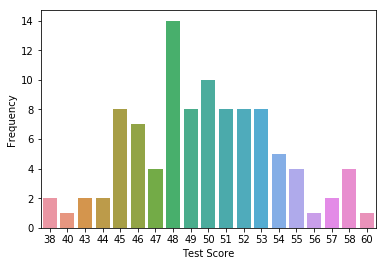

In [42]:
dataframe = test_score_distribution.DataFrame()

%matplotlib inline
# uncomment the following line if you get an module error saying seaborn not found
# !pip install seaborn
import seaborn

plot = seaborn.barplot(x='Test Score',y='Frequency', data=dataframe)

In [43]:
%%sql 

-- Feel free to experiment with the data set provided in this notebook for practice:
SELECT country, first_name, last_name, test_score FROM INTERNATIONAL_STUDENT_TEST_SCORES;    

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46
Poland,Cole,Winteringham,49
Sweden,Emlyn,Erricker,55
Russia,Cathee,Sivewright,49
China,Barny,Ingerson,57
Uganda,Sharla,Papaccio,55


# Analyzing a real world data-set with SQL and Python

# Introduction

This notebook shows how to store a dataset into a database using and analyze data using SQL and Python. In this lab you will:
1. Understand a dataset of selected socioeconomic indicators in Chicago
1. Learn how to store data in an Db2 database on IBM Cloud instance
1. Solve example problems to practice your SQL skills 

## Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](
https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2), but to summarize, the dataset has the following variables:

* **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

* **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago 

* **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

* **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

* **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

* **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

* **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

* **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

* **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In this Lab, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.


### Connect to the database
Let us first load the SQL extension and establish a connection with the database

In [44]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [45]:
# Remember the connection string is of the format:
# %sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name
# Enter the connection string for your Db2 on Cloud database instance below
# i.e. copy after db2:// from the URI string in Service Credentials of your Db2 instance. Remove the double quotes at the end.
%sql ibm_db_sa://xks76134:npglfs0j-k5sx39v@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB

'Connected: xks76134@BLUDB'

### Store the dataset in a Table
##### In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.

##### We will first read the dataset source .CSV from the internet into pandas dataframe

##### Then we need to create a table in our Db2 database to store the dataset. The PERSIST command in SQL "magic" simplifies the process of table creation and writing the data from a `pandas` dataframe into the table

In [46]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB


'Persisted chicago_socioeconomic_data'

##### You can verify that the table creation was successful by making a basic query like:

In [49]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


## Problems

### Problem 1

##### How many rows are in the dataset?
##### How many community areas in Chicago have a hardship index greater than 50.0?
##### What is the maximum value of hardship index in this dataset?

In [50]:
chicago_socioeconomic_data.shape

(78, 9)

In [64]:
%sql select count(*) from chicago_socioeconomic_data;

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.
Done.
Done.


1
98.0


In [65]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
38


In [66]:
%sql SELECT max(hardship_index) FROM chicago_socioeconomic_data;

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
98.0


### Problem 4

##### Which community area which has the highest hardship index?

In [68]:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index in (select max(hardship_index) FROM chicago_socioeconomic_data);

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


### Problem 5

##### Which Chicago community areas have per-capita incomes greater than $60,000?

In [71]:
%sql select community_area_name from chicago_socioeconomic_data where per_capita_income_>60000;

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


### Problem 6

##### Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


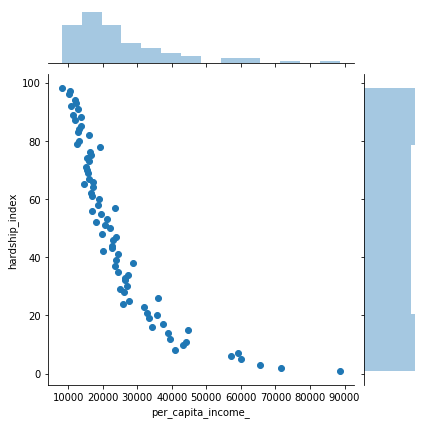

In [73]:
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

### Conclusion

##### Now that you know how to do basic exploratory data analysis using SQL and python visualization tools, you can further explore this dataset to see how the variable `per_capita_income_` is related to `percent_households_below_poverty` and `percent_aged_16_unemployed`. Try to create interesting visualizations!

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


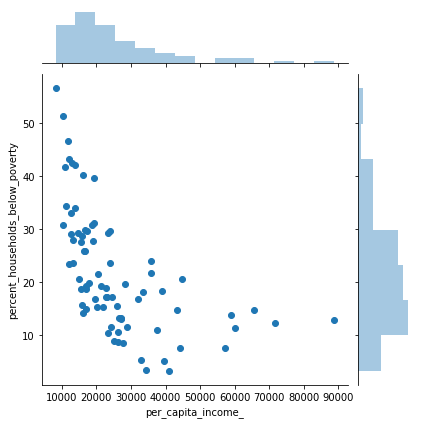

In [74]:
income_vs_households = %sql SELECT per_capita_income_, percent_households_below_poverty FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='percent_households_below_poverty', data=income_vs_households.DataFrame())

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


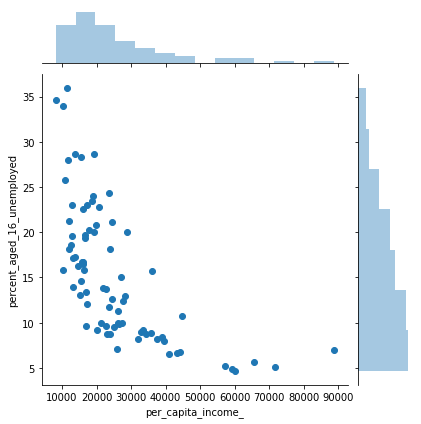

In [75]:
income_vs_age = %sql SELECT per_capita_income_, percent_aged_16_unemployed FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='percent_aged_16_unemployed', data=income_vs_age.DataFrame())

In [79]:
%sql select * from syscat.tables where tabschema='xks76134'

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,owner,ownertype,TYPE,status,base_tabschema,base_tabname,rowtypeschema,rowtypename,create_time,alter_time,invalidate_time,stats_time,colcount,tableid,tbspaceid,card,npages,mpages,fpages,npartitions,nfiles,tablesize,overflow,tbspace,index_tbspace,long_tbspace,parents,children,selfrefs,keycolumns,keyindexid,keyunique,checkcount,datacapture,const_checked,pmap_id,partition_mode,log_attribute,pctfree,append_mode,REFRESH,refresh_time,LOCKSIZE,VOLATILE,row_format,property,statistics_profile,compression,rowcompmode,access_mode,clustered,active_blocks,droprule,maxfreespacesearch,avgcompressedrowsize,avgrowcompressionratio,avgrowsize,pctrowscompressed,logindexbuild,codepage,collationschema,collationname,collationschema_orderby,collationname_orderby,encoding_scheme,pctpagessaved,last_regen_time,secpolicyid,protectiongranularity,auditpolicyid,auditpolicyname,auditexceptionenabled,definer,oncommit,logged,onrollback,lastused,control,temporaltype,tableorg,extended_row_size,pctextendedrows,remarks


# Working with a real world data-set using SQL and Python

# Introduction

This notebook shows how to work with a real world dataset using SQL and Python. In this lab you will:
1. Understand the dataset for Chicago Public School level performance 
1. Store the dataset in an Db2 database on IBM Cloud instance
1. Retrieve metadata about tables and columns and query data from mixed case columns
1. Solve example problems to practice your SQL skills including using built-in database functions

## Chicago Public Schools - Progress Report Cards (2011-2012) 

The city of Chicago released a dataset showing all school level performance data used to create School Report Cards for the 2011-2012 school year. The dataset is available from the Chicago Data Portal: https://data.cityofchicago.org/Education/Chicago-Public-Schools-Progress-Report-Cards-2011-/9xs2-f89t

This dataset includes a large number of metrics. Start by familiarizing yourself with the types of metrics in the database: https://data.cityofchicago.org/api/assets/AAD41A13-BE8A-4E67-B1F5-86E711E09D5F?download=true

__NOTE__: Do not download the dataset directly from City of Chicago portal. Instead download a more database friendly version from the link below.
Now download a static copy of this database and review some of its contents:
https://ibm.box.com/shared/static/f9gjvj1gjmxxzycdhplzt01qtz0s7ew7.csv



### Store the dataset in a Table
In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.

While it is easier to read the dataset into a Pandas dataframe and then PERSIST it into the database as we saw in the previous lab, it results in mapping to default datatypes which may not be optimal for SQL querying. For example a long textual field may map to a CLOB instead of a VARCHAR. 

Therefore, __it is highly recommended to manually load the table using the database console LOAD tool, as indicated in Week 2 Lab 1 Part II__. The only difference with that lab is that in Step 5 of the instructions you will need to click on create "(+) New Table" and specify the name of the table you want to create and then click "Next". 

##### Now open the Db2 console, open the LOAD tool, Select / Drag the .CSV file for the CHICAGO PUBLIC SCHOOLS dataset and load the dataset into a new table called __SCHOOLS__.

<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/uc4xjh1uxcc78ks1i18v668simioz4es.jpg"></a>

### Connect to the database
Let us now load the ipython-sql  extension and establish a connection with the database

In [80]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [81]:
%sql ibm_db_sa://xks76134:npglfs0j-k5sx39v@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB

'Connected: xks76134@BLUDB'

### Query the database system catalog to retrieve table metadata

##### You can verify that the table creation was successful by retrieving the list of all tables in your schema and checking whether the SCHOOLS table was created

In [90]:
%sql select TABSCHEMA, TABNAME, CREATE_TIME from SYSCAT.TABLES WHERE tabschema='XKS76134'

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,create_time
XKS76134,EMPLOYEES,2019-12-29 15:12:19.489356
XKS76134,JOB_HISTORY,2019-12-29 15:12:19.705731
XKS76134,DEPARTMENTS,2019-12-29 15:12:20.051024
XKS76134,LOCATIONS,2019-12-29 15:12:20.227385
XKS76134,JOBS,2019-12-29 15:53:28.068251
XKS76134,PETSALE,2019-12-29 18:45:24.290121
XKS76134,INSTRUCTOR,2019-12-30 14:17:11.719886
XKS76134,INTERNATIONAL_STUDENT_TEST_SCORES,2019-12-30 14:43:01.848398
XKS76134,CHICAGO_SOCIOECONOMIC_DATA,2019-12-30 15:05:57.593857
XKS76134,CHICAGO_PUBLIC_SCHOOLS,2019-12-30 16:21:41.000583


In [91]:
%sql select TABSCHEMA, TABNAME, CREATE_TIME from SYSCAT.TABLES where TABNAME = 'CHICAGO_PUBLIC_SCHOOLS'

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


tabschema,tabname,create_time
XKS76134,CHICAGO_PUBLIC_SCHOOLS,2019-12-30 16:21:41.000583


### Query the database system catalog to retrieve column metadata

##### The SCHOOLS table contains a large number of columns. How many columns does this table have?

In [92]:
%sql select count(*) from SYSCAT.COLUMNS where TABNAME = 'CHICAGO_PUBLIC_SCHOOLS'

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
78


Now retrieve the the list of columns in SCHOOLS table and their column type (datatype) and length.

In [93]:
%sql select COLNAME, TYPENAME, LENGTH from SYSCAT.COLUMNS where TABNAME = 'CHICAGO_PUBLIC_SCHOOLS'

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


colname,typename,length
School_ID,INTEGER,4
NAME_OF_SCHOOL,VARCHAR,65
"Elementary, Middle, or High School",VARCHAR,2
Street_Address,VARCHAR,30
City,VARCHAR,7
State,VARCHAR,2
ZIP_Code,INTEGER,4
Phone_Number,VARCHAR,14
Link,VARCHAR,78
Network_Manager,VARCHAR,40


## Problems

### Problem 1

##### How many Elementary Schools are in the dataset?

In [99]:
%%sql

select distinct("Elementary, Middle, or High School") from CHICAGO_PUBLIC_SCHOOLS;
select count("Elementary, Middle, or High School") from CHICAGO_PUBLIC_SCHOOLS WHERE "Elementary, Middle, or High School"='ES'

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.
Done.


1
462


### Problem 2

##### What is the highest Safety Score?

In [101]:
%sql SELECT MAX(SAFETY_SCORE) as "max" FROM CHICAGO_PUBLIC_SCHOOLS;

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


max
99


### Problem 3

##### Which schools have highest Safety Score?

In [105]:
%sql select NAME_OF_SCHOOL, SAFETY_SCORE from CHICAGO_PUBLIC_SCHOOLS where \
    SAFETY_SCORE in (SELECT MAX(SAFETY_SCORE) FROM CHICAGO_PUBLIC_SCHOOLS)

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school,safety_score
Abraham Lincoln Elementary School,99
Alexander Graham Bell Elementary School,99
Annie Keller Elementary Gifted Magnet School,99
Augustus H Burley Elementary School,99
Edgar Allan Poe Elementary Classical School,99
Edgebrook Elementary School,99
Ellen Mitchell Elementary School,99
James E McDade Elementary Classical School,99
James G Blaine Elementary School,99
LaSalle Elementary Language Academy,99


### Problem 4

##### What are the top 10 schools with the highest "Average Student Attendance"?


In [132]:
%sql select NAME_OF_SCHOOL, AVERAGE_STUDENT_ATTENDANCE from CHICAGO_PUBLIC_SCHOOLS \
    order by Average_Student_Attendance desc nulls last limit 10

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school,average_student_attendance
John Charles Haines Elementary School,98.40%
James Ward Elementary School,97.80%
Edgar Allan Poe Elementary Classical School,97.60%
Orozco Fine Arts & Sciences Elementary School,97.60%
Rachel Carson Elementary School,97.60%
Annie Keller Elementary Gifted Magnet School,97.50%
Andrew Jackson Elementary Language Academy,97.40%
Lenart Elementary Regional Gifted Center,97.40%
Disney II Magnet School,97.30%
John H Vanderpoel Elementary Magnet School,97.20%


### Problem 5

##### Retrieve the list of 5 Schools with the lowest Average Student Attendance sorted in ascending order based on attendance

In [126]:
%sql select NAME_OF_SCHOOL as NAME_OF_SCHOOL, AVERAGE_STUDENT_ATTENDANCE as AVERAGE_STUDENT_ATTENDANCE from CHICAGO_PUBLIC_SCHOOLS \
    order by AVERAGE_STUDENT_ATTENDANCE \
    fetch first 5 rows only

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%


### Problem 6

##### Now remove the '%' sign from the above result set for Average Student Attendance column

In [130]:
%sql SELECT Name_of_School, REPLACE(Average_Student_Attendance, '%', '') \
     from CHICAGO_PUBLIC_SCHOOLS \
     order by Average_Student_Attendance \
     fetch first 5 rows only

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school,2
Richard T Crane Technical Preparatory High School,57.90
Barbara Vick Early Childhood & Family Center,60.90
Dyett High School,62.50
Wendell Phillips Academy High School,63.00
Orr Academy High School,66.30


### Problem 7

##### Which Schools have Average Student Attendance lower than 70%?

In [139]:
%sql select Name_of_School, Average_Student_Attendance from CHICAGO_PUBLIC_SCHOOLS \
    where DECIMAL(REPLACE(Average_Student_Attendance, '%', '')) < 70 \
    order by Average_Student_Attendance

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%
Manley Career Academy High School,66.80%
Chicago Vocational Career Academy High School,68.80%
Roberto Clemente Community Academy High School,69.60%


### Problem 8

##### Get the total College Enrollment for each Community Area

In [142]:
%sql select COMMUNITY_AREA_NAME, sum(COLLEGE_ENROLLMENT) as "total College Enrollment" \
    from CHICAGO_PUBLIC_SCHOOLS \
    group by COMMUNITY_AREA_NAME;

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name,total College Enrollment
ALBANY PARK,6864
ARCHER HEIGHTS,4823
ARMOUR SQUARE,1458
ASHBURN,6483
AUBURN GRESHAM,4175
AUSTIN,10933
AVALON PARK,1522
AVONDALE,3640
BELMONT CRAGIN,14386
BEVERLY,1636


### Problem 9

##### Get the 5 Community Areas with the least total College Enrollment  sorted in ascending order 

In [143]:
%sql select COMMUNITY_AREA_NAME, sum(COLLEGE_ENROLLMENT) as "total College Enrollment" \
    from CHICAGO_PUBLIC_SCHOOLS \
    group by COMMUNITY_AREA_NAME \
    order by sum(COLLEGE_ENROLLMENT) \
    fetch first 5 rows only

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name,total College Enrollment
OAKLAND,140
FULLER PARK,531
BURNSIDE,549
OHARE,786
LOOP,871


### Problem 10

##### Get the hardship index for the community area which has College Enrollment of 4638

In [147]:
%sql select hardship_index \
    FROM chicago_socioeconomic_data CD, CHICAGO_PUBLIC_SCHOOLS CPS \
    WHERE CD.ca = CPS.community_area_number \
        and college_enrollment = 4368

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


hardship_index
6.0


### Problem 11

##### Get the hardship index for the community area which has the highest value for College Enrollment

In [149]:
%sql select ca, community_area_name, hardship_index FROM chicago_socioeconomic_data \
    WHERE ca in (select community_area_number from CHICAGO_PUBLIC_SCHOOLS order by college_enrollment desc limit 1)

 * ibm_db_sa://xks76134:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


ca,community_area_name,hardship_index
5.0,North Center,6.0
